# Atividade 14

## Tiago Vargas Pereira de Oliveira

#### 2021045050365

# Q5

**Implemente o GA podendo usar o código disponível no drive da aula, para resolver a função de 1 variável: $f(x) = x \cdot sen(x) + x \cdot cos(x)$, em que $x ∈ [0,14]$**

In [1]:
from math import sin, cos


In [2]:
import random


def generate_population(interval: tuple[float, float], quantity: int) -> list[float]:
	return [random.uniform(interval[0], interval[1]) for _ in range(quantity)]


In [3]:
from typing import Callable


def calculate_fitness(population: list[float], fitness_function: Callable[[float], float]) -> list[float]:
	return [fitness_function(x) for x in population]


In [4]:
Individual = tuple[float, float]  # (value, fitness_score)


def select_parents(population: list[Individual], amount_percentage: float) -> list[Individual]:
	num_winners = int(amount_percentage * len(population))
	winners = []
	while len(winners) < num_winners:
		contestants = random.sample(population, k=2)
		winner = max(contestants, key=lambda x: x[1])
		winners.append(winner)
	return winners


In [5]:
def arithmetic_crossover(parents: tuple[Individual, Individual], fitness_function: Callable[[float], float]) -> Individual:
	x_0 = parents[0][0]
	x_1 = parents[1][0]

	# Combina o x dos pais pra gerar os filhos
	alpha = random.random()
	child = alpha * x_0 + (1 - alpha) * x_1
	fitness = fitness_function(child)

	return (child, fitness)


In [6]:
def generate_offspring(parents: list[Individual], fitness_function: Callable[[float], float]) -> list[Individual]:
	offspring = []
	for _ in range(len(parents) // 2):  # Até a metade, porque escolho 2 pais
		[parent_1, parent_2] = random.sample(parents, 2)
		child = arithmetic_crossover((parent_1, parent_2), fitness_function)
		offspring.append(child)
	return offspring


In [7]:
def mutate(individual: float, mutation_rate: float) -> float:
	# Mutação de um indivíduo adicionando um x aleatório
	if random.random() < mutation_rate:
		return individual + random.uniform(-1, 1)  # Talvez mudar esse intervalo?
	else:
		return individual


In [8]:
def replacement_worst_individuals(population: list[Individual], offspring: list[Individual]) -> list[Individual]:
	population.sort(key=lambda x: x[1], reverse=False)  # Dos piores pros melhores
	offspring.sort(key=lambda x: x[1], reverse=True)  # Dos melhores pros piores

	num_replace = len(offspring) // 2

	# Troca os piores de `population` pelos melhores de `offspring`
	population[:num_replace] = offspring[:num_replace]

	return population


In [9]:
population_size = 50
fitness_function = lambda x: x * sin(x) + x * cos(x)
max_generations = 100

population = generate_population(interval=(0, 14), quantity=population_size)
fitness = calculate_fitness(population, fitness_function)
individuals: list[Individual] = list(zip(population, fitness))
for generation in range(max_generations):
	parents = select_parents(individuals, amount_percentage=0.5)

	offspring = generate_offspring(parents, fitness_function)

	improved_individuals = replacement_worst_individuals(individuals, offspring)

	individuals = improved_individuals

individuals.sort(key=lambda x: x[1], reverse=True)  # Dos melhores pros piores
print(f'Melhor indivíduo: x = {individuals[0][0]}, y = {individuals[0][1]}')


Melhor indivíduo: x = 13.426113213933581, y = 18.934943001216745


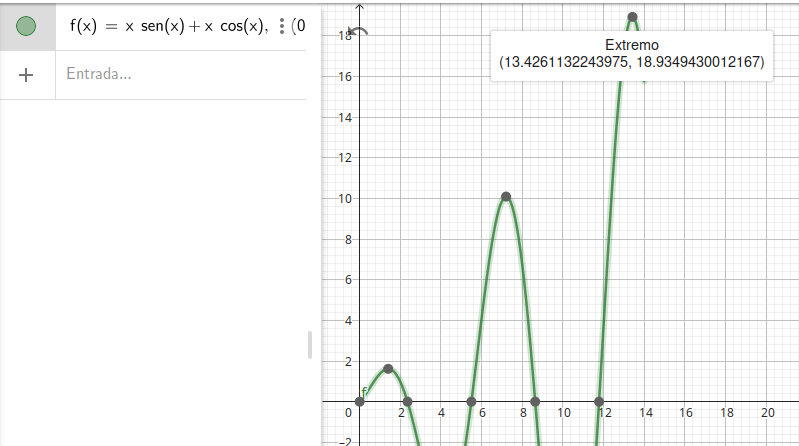

# Q6

**Implemente o PSO podendo usar o código disponível no drive da aula, para resolver a função de 2 variáveis: $f(a, b) = 20 + a² + b² − 10(cos(2πa) + cos(2πb))$, em que $a ∈ [−5, 12]$ e $b ∈ [+5, 12]$**